1. drinks.csv 파일 로드
2. 결측치 확인
3. continent 컬럼에 결측치 존재 -> 결측치를 'OT'로 대체
4. continent 별 spririt_servings 컬럼의 평균, 최소, 최대, 합계를 출력
5. 4개의 값들을 그래프로 표시 (바형 그래프)
6. total_liters_of_pure_alcohol 컬럼의 평균보다 높은 continent가 어디인지 출력

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drinks=pd.read_csv('../csv/drinks.csv')

In [3]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [4]:
drinks['continent']=drinks['continent'].fillna('OT')

In [5]:
group=drinks.groupby('continent').sum()

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_65044\1202339940.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group=drinks.groupby('continent').sum()


In [6]:
# continent 별 spirit_savings 컬럼의 평균, 최대, 최소, 합계
group_data=drinks.groupby('continent').agg(['mean','min','max','sum'])['spirit_servings']

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_65044\2145803580.py:2: FutureWarning: ['country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  group_data=drinks.groupby('continent').agg(['mean','min','max','sum'])['spirit_servings']


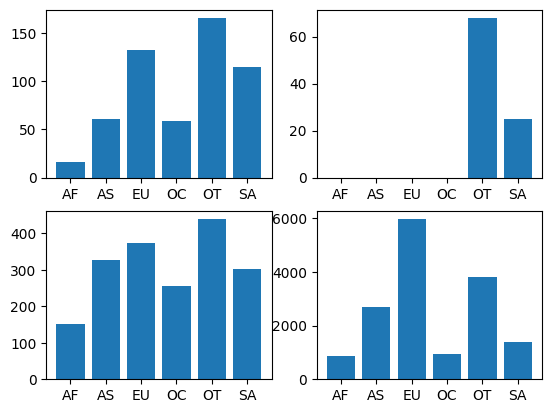

In [7]:
#시각화 - 4개의 그래프를 subplot() 이용하여 출력
#바형 그래프

plt.subplot(2,2,1)
plt.bar(group_data.index, group_data['mean'])
plt.subplot(2,2,2)
plt.bar(group_data.index, group_data['min'])
plt.subplot(2,2,3)
plt.bar(group_data.index, group_data['max'])
plt.subplot(2,2,4)
plt.bar(group_data.index, group_data['sum'])
plt.show()



In [8]:
# 전체 술 소비량의 평균보다 높은 continent가 어디인가?
# continent 별 전체 술 소비량 평균을 구하는 데이터프레임 생성
group_data_2= drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']


C:\Users\ssjjk\AppData\Local\Temp\ipykernel_65044\1194645785.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data_2= drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']


In [9]:
# 전체 술 소비량의 평균
total_mean=drinks.mean()['total_litres_of_pure_alcohol']

C:\Users\ssjjk\AppData\Local\Temp\ipykernel_65044\683862822.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_mean=drinks.mean()['total_litres_of_pure_alcohol']


In [10]:
# 그룹회한 데이터와 전체 술소비량의 평균 값을 가지고 비교
group_data_2[group_data_2 >= total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64